## import library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics 
from sklearn import preprocessing
from sklearn import utils
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC 

## read csv file

In [2]:
data = pd.read_csv('train.csv')
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


## convert csv to DataFrame

In [3]:
df = pd.DataFrame(data)
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


## Numerical data analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [5]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [6]:
df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

## Visual data analysis

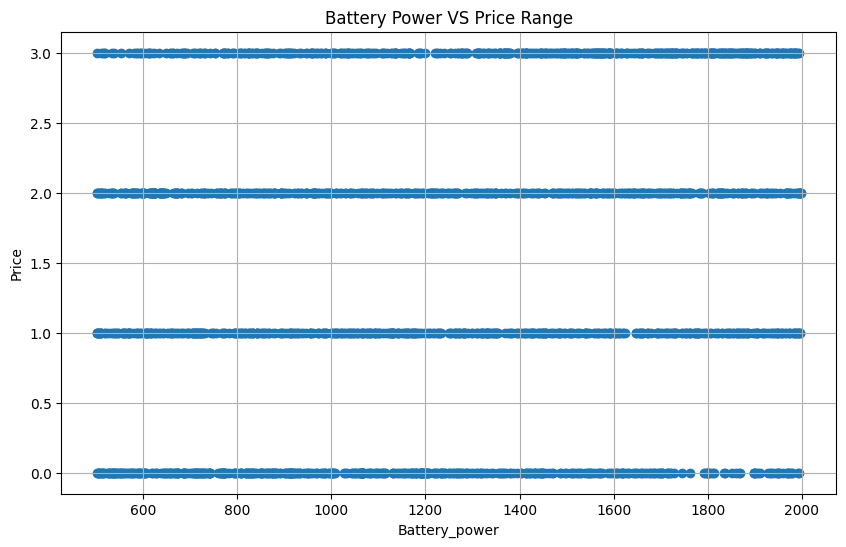

In [7]:
plt.figure(figsize=[10, 6])
plt.scatter(df['battery_power'], df['price_range'])
plt.title('Battery Power VS Price Range')
plt.xlabel('Battery_power')
plt.ylabel('Price')
plt.grid()
# plt.savefig('battery_power_and_price.jpeg', dpi=1200)
plt.show()

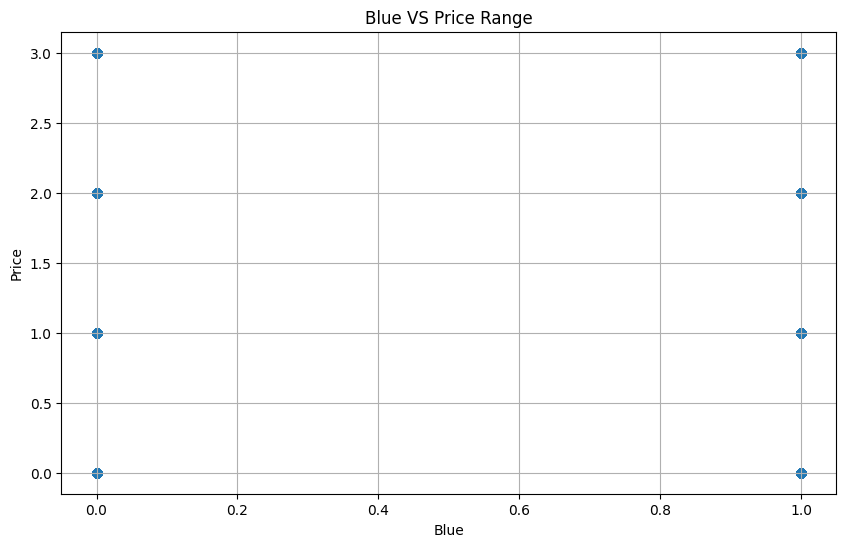

In [8]:
plt.figure(figsize=[10, 6])
plt.scatter(df['blue'], df['price_range'])
plt.title('Blue VS Price Range')
plt.xlabel('Blue')
plt.ylabel('Price')
plt.grid()
# plt.savefig('blue_and_price.jpeg', dpi=1200)
plt.show()

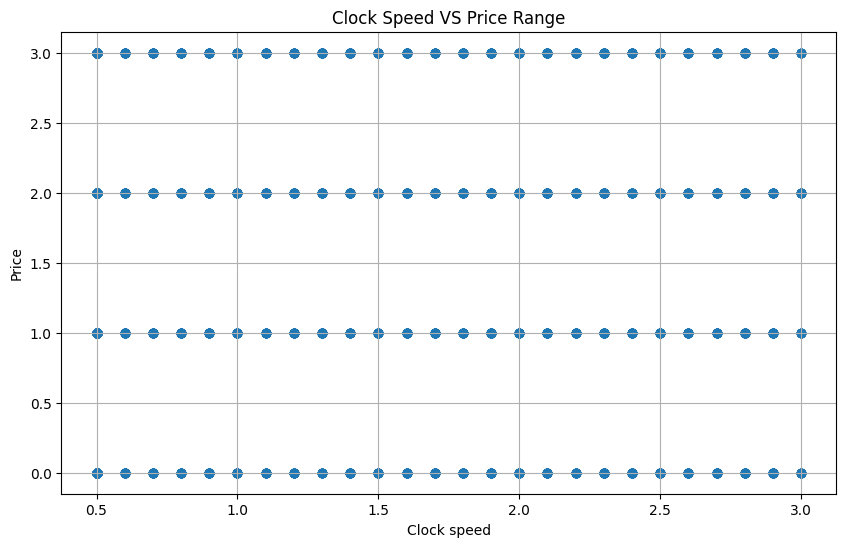

In [9]:
plt.figure(figsize=[10, 6])
plt.scatter(df['clock_speed'], df['price_range'])
plt.title('Clock Speed VS Price Range')
plt.xlabel('Clock speed')
plt.ylabel('Price')
plt.grid()
# plt.savefig('clock_speed_and_price.jpeg', dpi=1200)
plt.show()

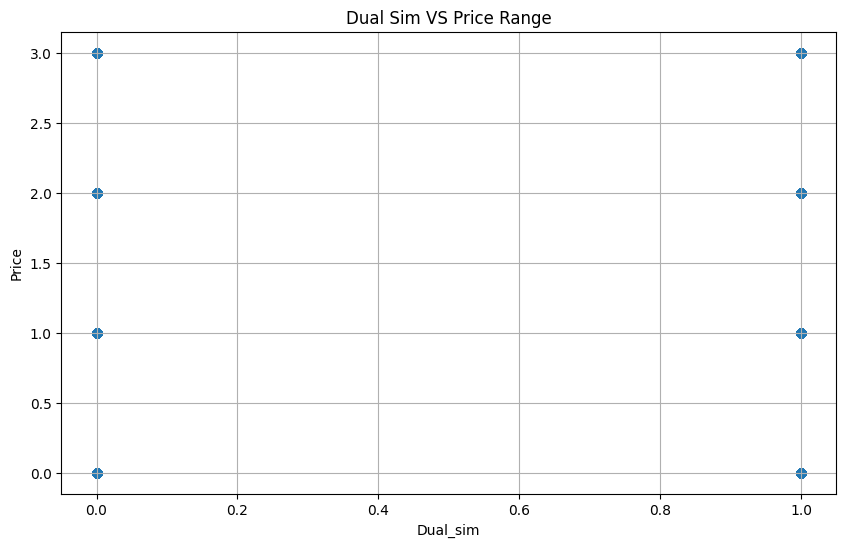

In [10]:
plt.figure(figsize=[10, 6])
plt.scatter(df['dual_sim'], df['price_range'])
plt.title('Dual Sim VS Price Range')
plt.xlabel('Dual_sim')
plt.ylabel('Price')
plt.grid()
# plt.savefig('dual_sim_and_price.jpeg', dpi=1200)
plt.show()

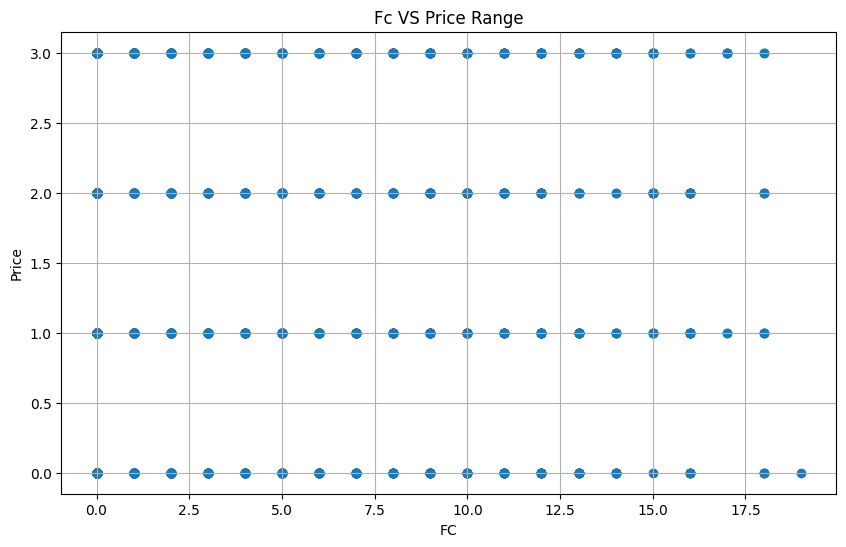

In [11]:
plt.figure(figsize=[10, 6])
plt.scatter(df['fc'], df['price_range'])
plt.title('Fc VS Price Range')
plt.xlabel('FC')
plt.ylabel('Price')
plt.grid()
# plt.savefig('fc_and_price.jpeg', dpi=1200)
plt.show()

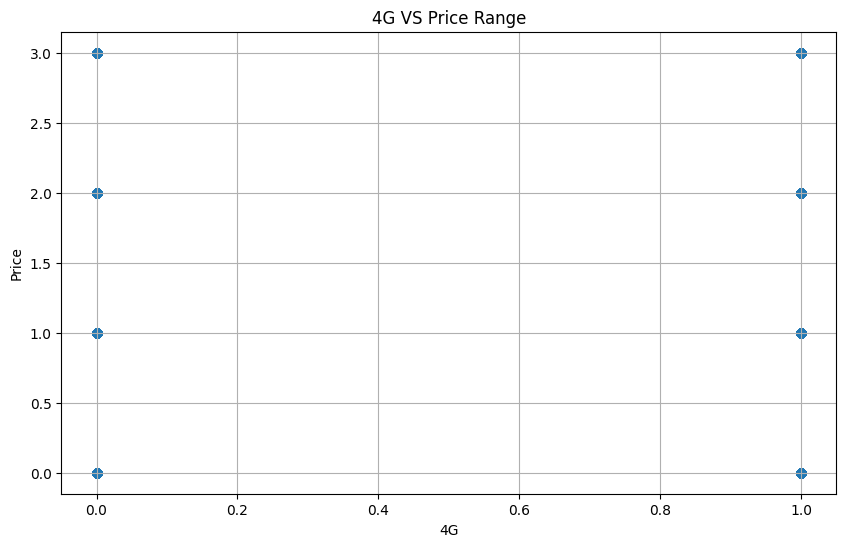

In [12]:
plt.figure(figsize=[10, 6])
plt.scatter(df['four_g'], df['price_range'])
plt.title('4G VS Price Range')
plt.xlabel('4G')
plt.ylabel('Price')
plt.grid()
# plt.savefig('four_g_and_price.jpeg', dpi=1200)
plt.show()

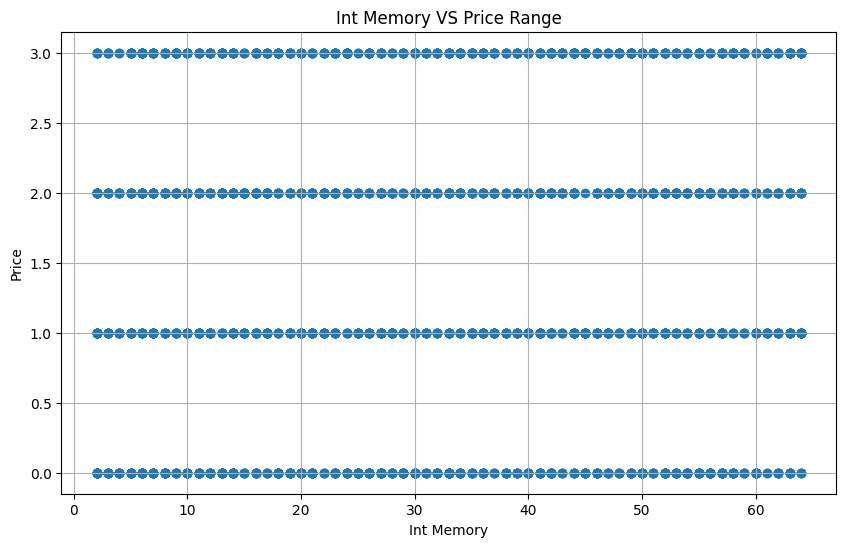

In [13]:
plt.figure(figsize=[10, 6])
plt.scatter(df['int_memory'], df['price_range'])
plt.title('Int Memory VS Price Range')
plt.xlabel('Int Memory')
plt.ylabel('Price')
plt.grid()
# plt.savefig('int_memory_and_price.jpeg', dpi=1200)
plt.show()

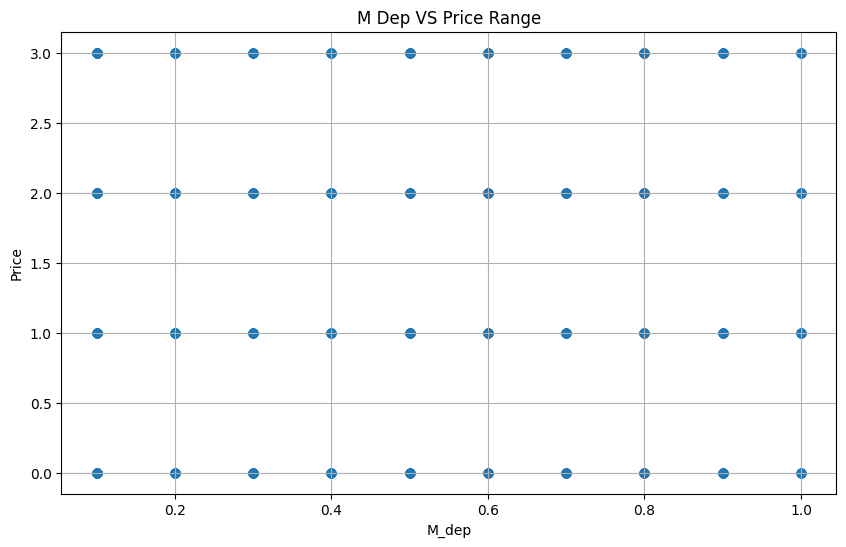

In [14]:
plt.figure(figsize=[10, 6])
plt.scatter(df['m_dep'], df['price_range'])
plt.title('M Dep VS Price Range')
plt.xlabel('M_dep')
plt.ylabel('Price')
plt.grid()
# plt.savefig('m_dep_and_price.jpeg', dpi=1200)
plt.show()

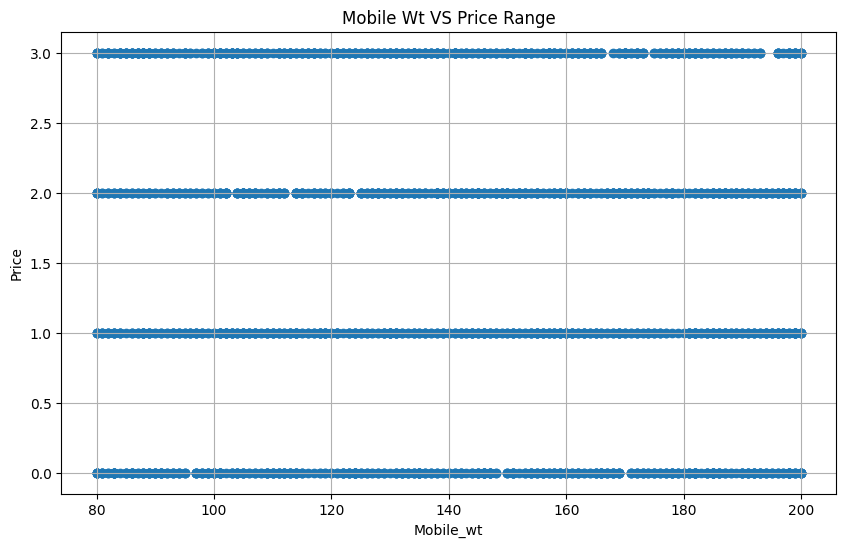

In [15]:
plt.figure(figsize=[10, 6])
plt.scatter(df['mobile_wt'], df['price_range'])
plt.title('Mobile Wt VS Price Range')
plt.xlabel('Mobile_wt')
plt.ylabel('Price')
plt.grid()
# plt.savefig('mobile_wt_and_price.jpeg', dpi=1200)
plt.show()

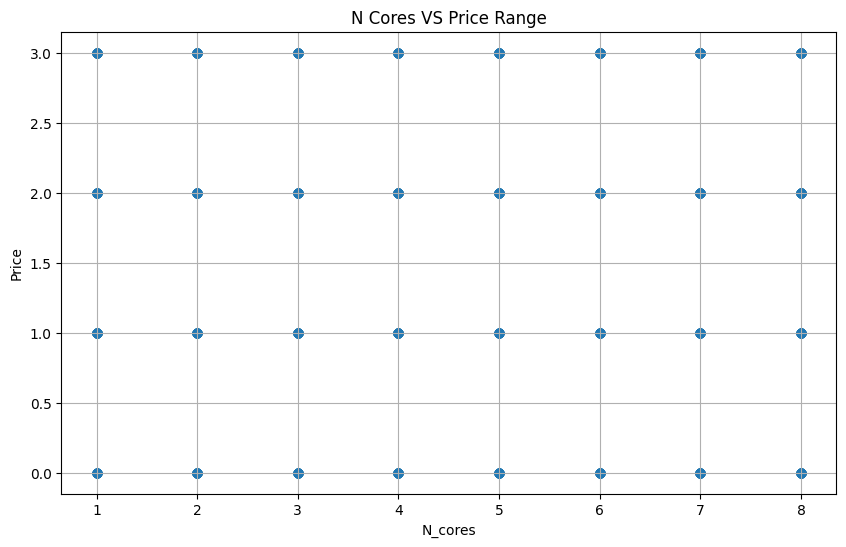

In [16]:
plt.figure(figsize=[10, 6])
plt.scatter(df['n_cores'], df['price_range'])
plt.title('N Cores VS Price Range')
plt.xlabel('N_cores')
plt.ylabel('Price')
plt.grid()
# plt.savefig('n_cores_and_price.jpeg', dpi=1200)
plt.show()

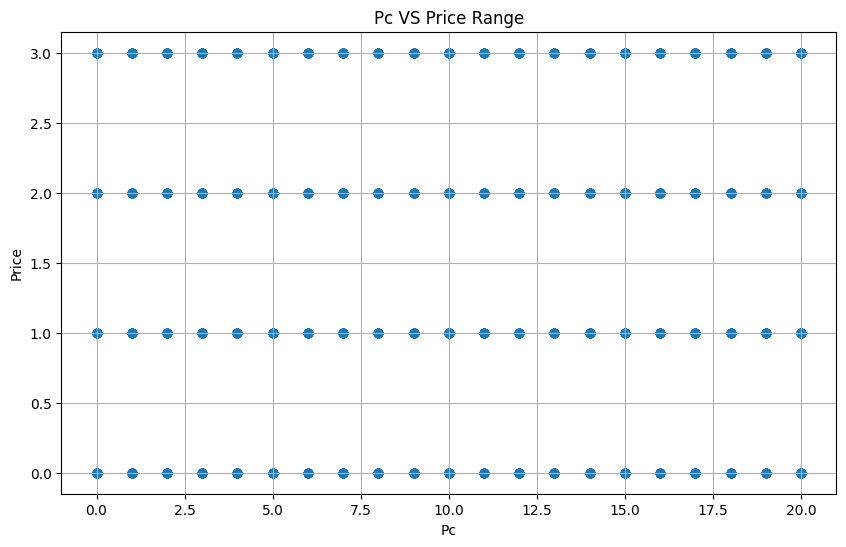

In [17]:
plt.figure(figsize=[10, 6])
plt.scatter(df['pc'], df['price_range'])
plt.title('Pc VS Price Range')
plt.xlabel('Pc')
plt.ylabel('Price')
plt.grid()
# plt.savefig('pc_and_price.jpeg', dpi=1200)
plt.show()

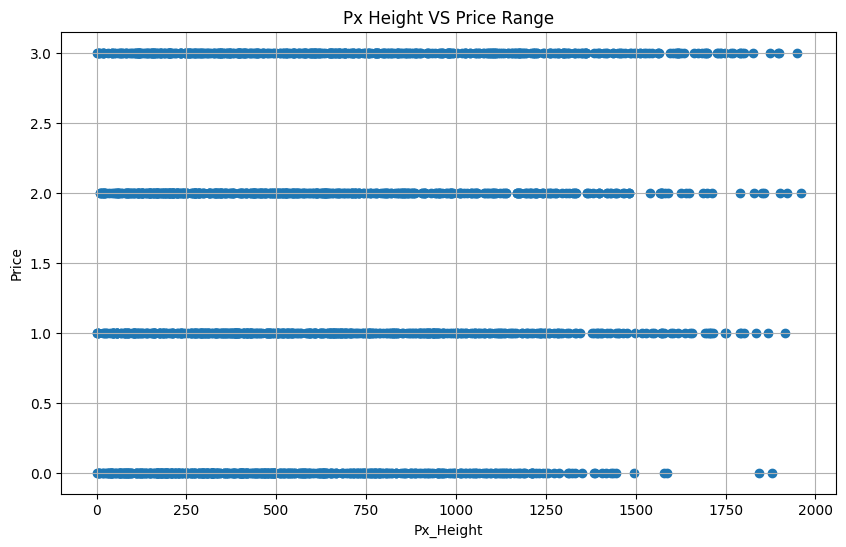

In [18]:
plt.figure(figsize=[10, 6])
plt.scatter(df['px_height'], df['price_range'])
plt.title('Px Height VS Price Range')
plt.xlabel('Px_Height')
plt.ylabel('Price')
plt.grid()
# plt.savefig('px_height_and_price.jpeg', dpi=1200)
plt.show()

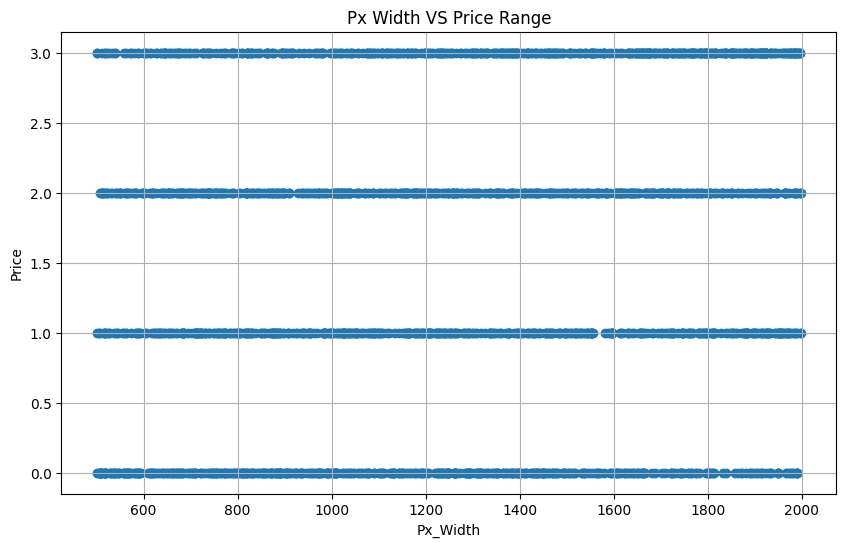

In [19]:
plt.figure(figsize=[10, 6])
plt.scatter(df['px_width'], df['price_range'])
plt.title('Px Width VS Price Range')
plt.xlabel('Px_Width')
plt.ylabel('Price')
plt.grid()
# plt.savefig('px_width_and_price.jpeg', dpi=1200)
plt.show()

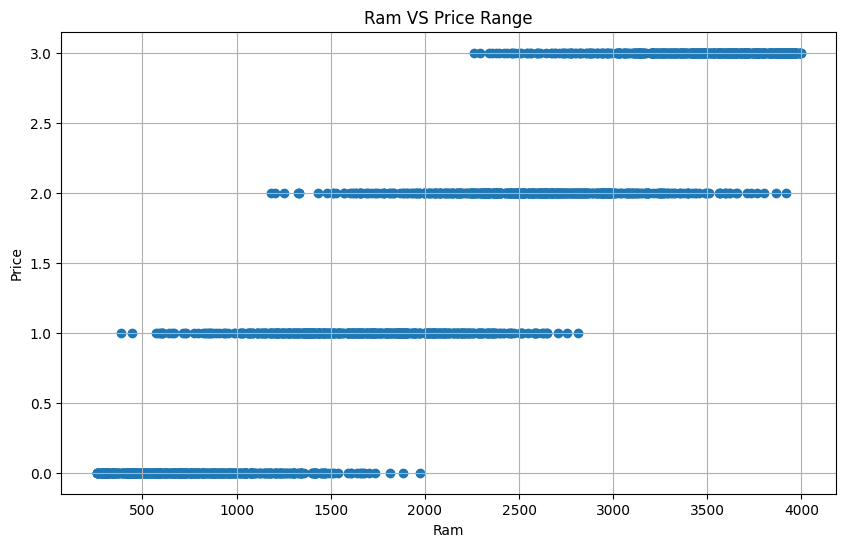

In [20]:
plt.figure(figsize=[10, 6])
plt.scatter(df['ram'], df['price_range'])
plt.title('Ram VS Price Range')
plt.xlabel('Ram')
plt.ylabel('Price')
plt.grid()
# plt.savefig('ram_and_price.jpeg', dpi=1200)
plt.show()

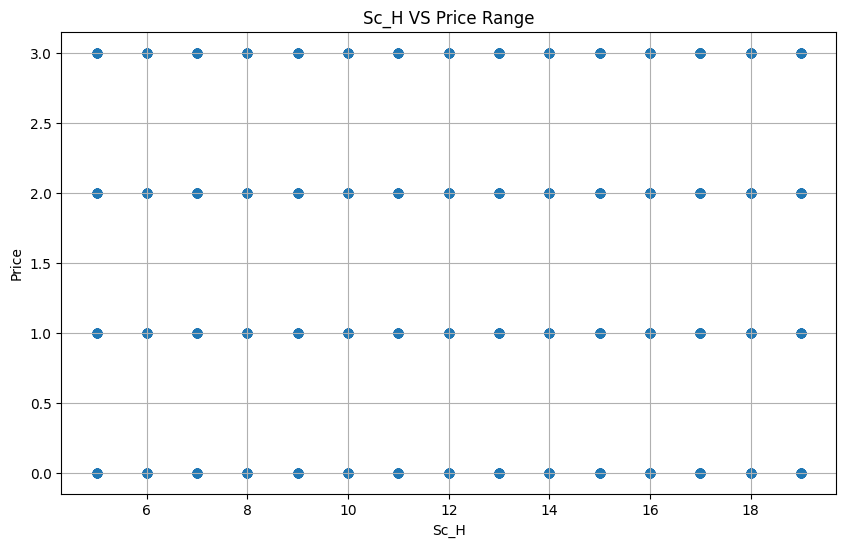

In [21]:
plt.figure(figsize=[10, 6])
plt.scatter(df['sc_h'], df['price_range'])
plt.title('Sc_H VS Price Range')
plt.xlabel('Sc_H')
plt.ylabel('Price')
plt.grid()
# plt.savefig('sc_h_and_price.jpeg', dpi=1200)
plt.show()

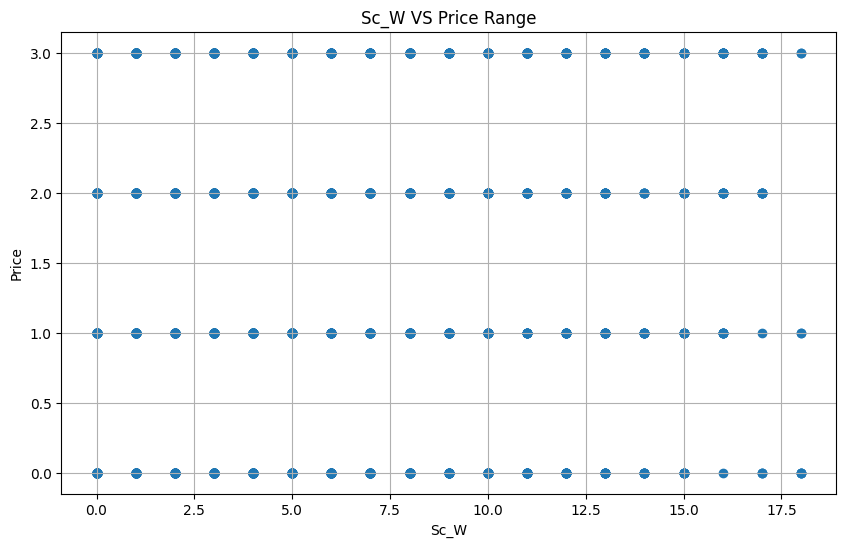

In [22]:
plt.figure(figsize=[10, 6])
plt.scatter(df['sc_w'], df['price_range'])
plt.title('Sc_W VS Price Range')
plt.xlabel('Sc_W')
plt.ylabel('Price')
plt.grid()
# plt.savefig('sc_w_and_price.jpeg', dpi=1200)
plt.show()

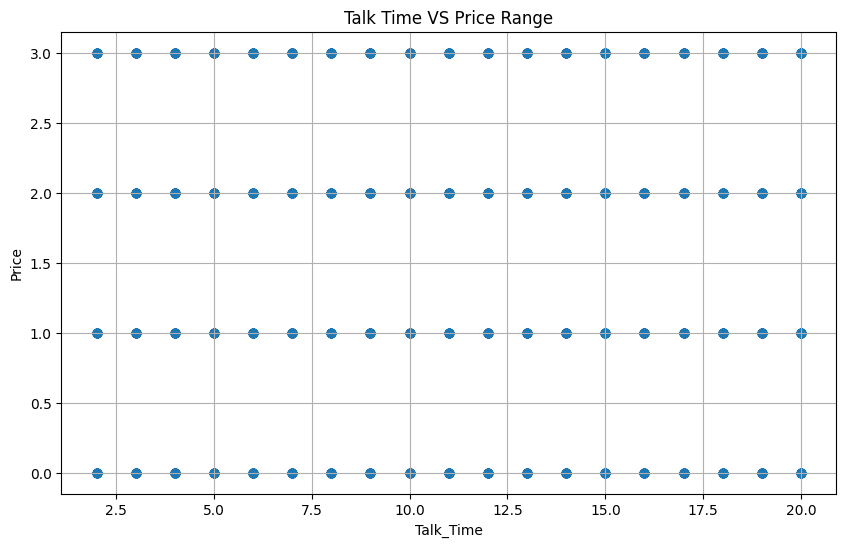

In [23]:
plt.figure(figsize=[10, 6])
plt.scatter(df['talk_time'], df['price_range'])
plt.title('Talk Time VS Price Range')
plt.xlabel('Talk_Time')
plt.ylabel('Price')
plt.grid()
# plt.savefig('talk_time_and_price.jpeg', dpi=1200)
plt.show()

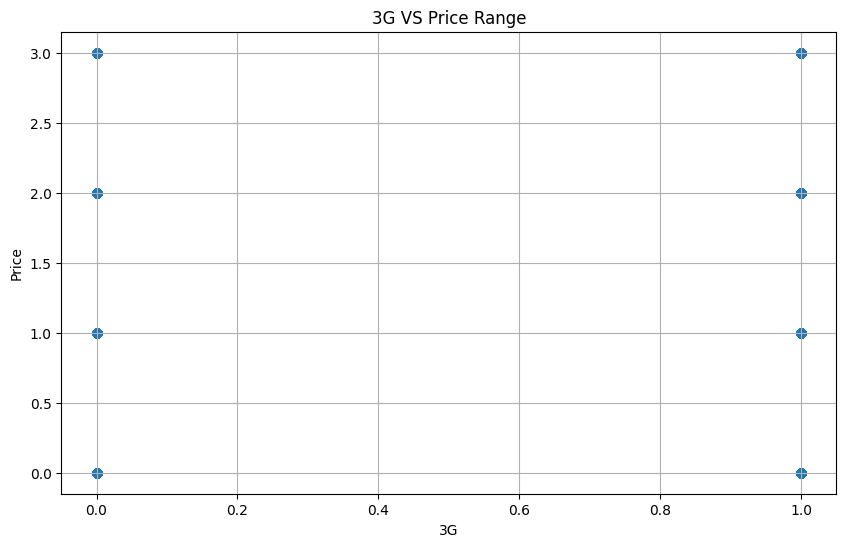

In [24]:
plt.figure(figsize=[10, 6])
plt.scatter(df['three_g'], df['price_range'])
plt.title('3G VS Price Range')
plt.xlabel('3G')
plt.ylabel('Price')
plt.grid()
# plt.savefig('3G_and_price.jpeg', dpi=1200)
plt.show()

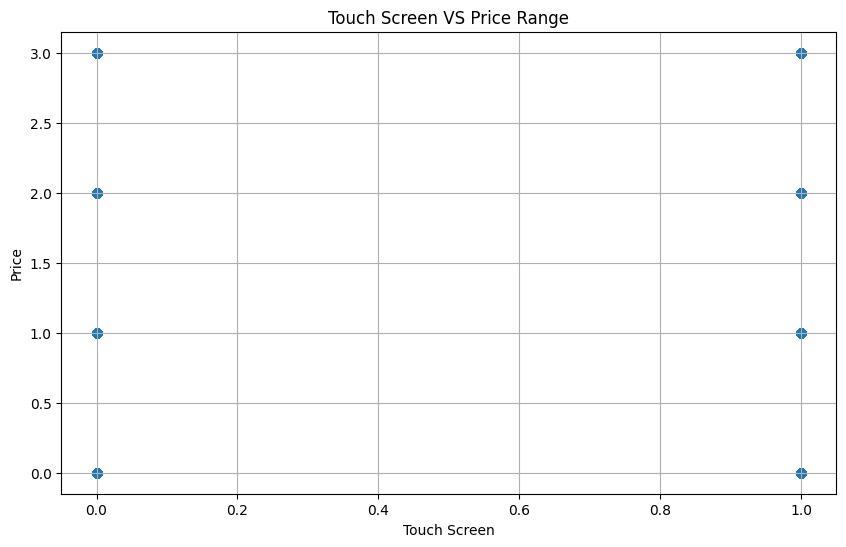

In [25]:
plt.figure(figsize=[10, 6])
plt.scatter(df['touch_screen'], df['price_range'])
plt.title('Touch Screen VS Price Range')
plt.xlabel('Touch Screen')
plt.ylabel('Price')
plt.grid()
# plt.savefig('touch_screen_and_price.jpeg', dpi=1200)
plt.show()

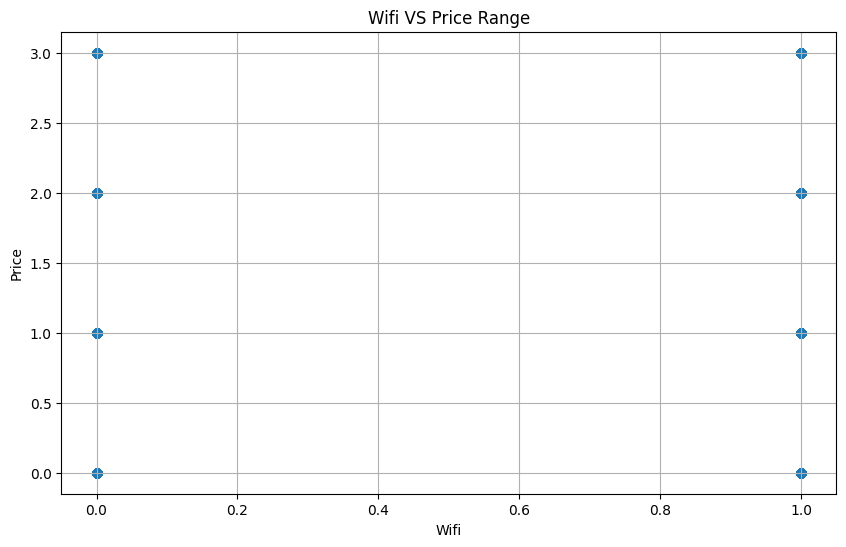

In [26]:
plt.figure(figsize=[10, 6])
plt.scatter(df['wifi'], df['price_range'])
plt.title('Wifi VS Price Range')
plt.xlabel('Wifi')
plt.ylabel('Price')
plt.grid()
# plt.savefig('wifi_and_price.jpeg', dpi=1200)
plt.show()

## Normalize the data

In [27]:
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(df)
# unscaled = scaler.inverse_transform(scaled)
df = pd.DataFrame(scaled, columns=['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi', 'price_range'])

In [28]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.492664,0.4950,0.408900,0.509500,0.226816,0.521500,0.484621,0.446389,0.502075,0.502929,...,0.329137,0.501679,0.499255,0.521893,0.320389,0.500611,0.761500,0.503000,0.507000,0.500000
std,0.293533,0.5001,0.326402,0.500035,0.228497,0.499662,0.292673,0.320462,0.294997,0.326834,...,0.226419,0.288518,0.289880,0.300946,0.242022,0.303553,0.426273,0.500116,0.500076,0.372771
min,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.234302,0.0000,0.080000,0.000000,0.052632,0.000000,0.225806,0.111111,0.241667,0.285714,...,0.144260,0.250167,0.254276,0.285714,0.111111,0.222222,1.000000,0.000000,0.000000,0.250000
50%,0.484302,0.0000,0.400000,1.000000,0.157895,1.000000,0.483871,0.444444,0.508333,0.428571,...,0.287755,0.498665,0.505211,0.500000,0.277778,0.500000,1.000000,1.000000,1.000000,0.500000
75%,0.744322,1.0000,0.680000,1.000000,0.368421,1.000000,0.741935,0.777778,0.750000,0.857143,...,0.483291,0.756342,0.750534,0.785714,0.500000,0.777778,1.000000,1.000000,1.000000,0.750000
max,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
X = pd.DataFrame(df.drop('price_range', axis=1))
y = pd.DataFrame(df['price_range']).values.reshape(-1, 1)

In [30]:
X

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,0.227789,0.0,0.68,0.0,0.052632,0.0,0.080645,0.555556,0.900000,0.142857,0.10,0.010204,0.170895,0.612774,0.285714,0.388889,0.944444,0.0,0.0,1.0
1,0.347361,1.0,0.00,1.0,0.000000,1.0,0.822581,0.666667,0.466667,0.285714,0.30,0.461735,0.993324,0.634687,0.857143,0.166667,0.277778,1.0,1.0,0.0
2,0.041416,1.0,0.00,1.0,0.105263,1.0,0.629032,0.888889,0.541667,0.571429,0.30,0.644388,0.811749,0.627205,0.428571,0.111111,0.388889,1.0,1.0,0.0
3,0.076152,1.0,0.80,0.0,0.000000,0.0,0.129032,0.777778,0.425000,0.714286,0.45,0.620408,0.858478,0.671566,0.785714,0.444444,0.500000,1.0,0.0,0.0
4,0.881764,1.0,0.28,0.0,0.684211,1.0,0.677419,0.555556,0.508333,0.142857,0.70,0.616327,0.475300,0.308658,0.214286,0.111111,0.722222,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.195725,1.0,0.00,1.0,0.000000,1.0,0.000000,0.777778,0.216667,0.714286,0.70,0.623469,0.927904,0.110102,0.571429,0.222222,0.944444,1.0,1.0,0.0
1996,0.977956,1.0,0.84,1.0,0.000000,0.0,0.596774,0.111111,0.891667,0.428571,0.15,0.466837,0.977971,0.474613,0.428571,0.555556,0.777778,1.0,1.0,1.0
1997,0.941884,0.0,0.16,1.0,0.052632,1.0,0.548387,0.666667,0.233333,1.000000,0.15,0.442857,0.755674,0.748530,0.285714,0.055556,0.166667,1.0,1.0,0.0
1998,0.675351,0.0,0.16,0.0,0.210526,1.0,0.709677,0.000000,0.541667,0.571429,0.25,0.171429,0.113485,0.163816,0.928571,0.555556,0.944444,1.0,1.0,1.0


In [31]:
y

array([[0.33333333],
       [0.66666667],
       [0.66666667],
       ...,
       [1.        ],
       [0.        ],
       [1.        ]])

## create train, test, split from data

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

## convert continuous data to multiclass

In [33]:
# train
lab_enc_train = preprocessing.LabelEncoder()
y_train_encoded = lab_enc_train.fit_transform(y_train.ravel())

print("train : ",utils.multiclass.type_of_target(y_train.ravel()))

print("train : ",utils.multiclass.type_of_target(y_train.ravel().astype('int')))

print("train : ",utils.multiclass.type_of_target(y_train_encoded))

#test
lab_enc_test = preprocessing.LabelEncoder()
y_test_encoded = lab_enc_test.fit_transform(y_test.ravel())

print("test : ",utils.multiclass.type_of_target(y_test.ravel()))

print("test : ",utils.multiclass.type_of_target(y_test.ravel().astype('int')))

print("test : ",utils.multiclass.type_of_target(y_test_encoded))

train :  continuous
train :  binary
train :  multiclass
test :  continuous
test :  binary
test :  multiclass


In [34]:
print("X_train : ",utils.multiclass.type_of_target(X_train))
print("y_train : ",utils.multiclass.type_of_target(y_train))
print("X_test : ",utils.multiclass.type_of_target(X_test))
print("y_test : ",utils.multiclass.type_of_target(y_test))
print("X : ",utils.multiclass.type_of_target(X))
print("y : ",utils.multiclass.type_of_target(y))
print("y_test_encoded : ",utils.multiclass.type_of_target(y_test_encoded))





X_train :  continuous-multioutput
y_train :  continuous
X_test :  continuous-multioutput
y_test :  continuous
X :  continuous-multioutput
y :  continuous
y_test_encoded :  multiclass


<h1>Decision Tree Model</h1>

## Ensemble

In [35]:
score = []
for i in range(1, 1000):
    model_DT_ensemble = DecisionTreeClassifier(criterion='entropy', max_depth=i)
    model_DT_ensemble.fit(X_train, y_train_encoded)
    y_pred_DT_ensemble = model_DT_ensemble.predict(X_test)
    score.append(metrics.accuracy_score(y_test_encoded, y_pred_DT_ensemble))
score

[0.5425,
 0.75,
 0.755,
 0.7925,
 0.8225,
 0.845,
 0.83,
 0.8475,
 0.845,
 0.835,
 0.84,
 0.8375,
 0.8625,
 0.855,
 0.845,
 0.845,
 0.85,
 0.85,
 0.8475,
 0.8425,
 0.84,
 0.8525,
 0.84,
 0.8425,
 0.84,
 0.8475,
 0.845,
 0.8475,
 0.835,
 0.8325,
 0.85,
 0.84,
 0.84,
 0.8525,
 0.8375,
 0.85,
 0.8375,
 0.835,
 0.845,
 0.8425,
 0.8475,
 0.85,
 0.845,
 0.8475,
 0.8425,
 0.8375,
 0.8375,
 0.8475,
 0.835,
 0.8425,
 0.8325,
 0.845,
 0.8425,
 0.8475,
 0.84,
 0.85,
 0.8525,
 0.84,
 0.8525,
 0.845,
 0.845,
 0.835,
 0.85,
 0.8475,
 0.8375,
 0.84,
 0.8425,
 0.84,
 0.8375,
 0.8375,
 0.85,
 0.85,
 0.8375,
 0.835,
 0.8475,
 0.8425,
 0.8425,
 0.8475,
 0.84,
 0.8375,
 0.8525,
 0.8425,
 0.84,
 0.845,
 0.845,
 0.84,
 0.85,
 0.8425,
 0.8425,
 0.8375,
 0.845,
 0.8425,
 0.8425,
 0.8375,
 0.84,
 0.845,
 0.84,
 0.84,
 0.8475,
 0.8475,
 0.8425,
 0.8475,
 0.845,
 0.845,
 0.84,
 0.85,
 0.85,
 0.845,
 0.8425,
 0.845,
 0.855,
 0.8425,
 0.845,
 0.8425,
 0.85,
 0.845,
 0.845,
 0.845,
 0.8525,
 0.85,
 0.845,
 0.845,
 

In [36]:
max(score)

0.8625

In [37]:
for index, num in enumerate(score):
    if num > 0.87:
        print(index, num)

In [38]:
model_DT_1 = DecisionTreeClassifier( max_depth=15)
model_DT_2 = DecisionTreeClassifier(criterion='entropy', max_depth=15)
model_DT_3 = DecisionTreeClassifier(criterion='log_loss', max_depth=15)


## fit model on train dataset

In [39]:
model_DT_1.fit(X_train, y_train_encoded)

DecisionTreeClassifier(max_depth=15)

In [40]:
# y_train_encoded

In [41]:
# y_train

## predict test dataset

In [42]:
y_pred_DT_1 = model_DT_1.predict(X_test)

## score of test and predict data

In [43]:
print('Accuracy :', metrics.accuracy_score(y_test_encoded, y_pred_DT_1))

Accuracy : 0.845


In [44]:
compare1 =pd.DataFrame({'actual': y_test_encoded.flatten(),
          'predict' : y_pred_DT_1.flatten()})
compare1

,actual,predict
0,0,0
1,2,2
2,1,1
3,3,3
4,1,1
...,...,...
395,3,3
396,2,1
397,1,1
398,1,1


## Ensemble

In [45]:
model_DT_2.fit(X_train, y_train_encoded)
y_pred_DT_2 = model_DT_2.predict(X_test)
print('Accuracy :', metrics.accuracy_score(y_test_encoded, y_pred_DT_2))


Accuracy : 0.8425


In [46]:
model_DT_3.fit(X_train, y_train_encoded)
y_pred_DT_3 = model_DT_3.predict(X_test)
print('Accuracy :', metrics.accuracy_score(y_test_encoded, y_pred_DT_3))

Accuracy : 0.84


# Score

In [47]:
print("test : ",utils.multiclass.type_of_target(y.ravel()))


test :  continuous


In [48]:
print("test : ",utils.multiclass.type_of_target(X))


test :  continuous-multioutput


In [49]:
lab_enc_y = preprocessing.LabelEncoder()
y_encoded = lab_enc_y.fit_transform(y.ravel())

In [50]:
confusion_matrix(y_encoded, model_DT_3.predict(X))

array([[487,  13,   0,   0],
       [  7, 486,   7,   0],
       [  0,  12, 477,  11],
       [  0,   0,  14, 486]])

In [51]:
print(classification_report(y_encoded, model_DT_3.predict(X)))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       500
           1       0.95      0.97      0.96       500
           2       0.96      0.95      0.96       500
           3       0.98      0.97      0.97       500

    accuracy                           0.97      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.97      0.97      0.97      2000



## crass validation_Desision_tree

In [52]:
kfold1 = KFold(10)
cross_val_1 = cross_val_score(model_DT_3, X_train, y_train_encoded, cv=kfold1)
print(cross_val_1)

[0.825   0.9125  0.8625  0.81875 0.8625  0.8625  0.94375 0.81875 0.84375
 0.83125]


In [53]:
print(np.mean(cross_val_1))

0.858125


In [54]:
from sklearn import tree

[Text(0.46023787313432835, 0.9583333333333334, 'X[13] <= 0.524\nlog_loss = 2.0\nsamples = 1600\nvalue = [395, 409, 408, 388]'),
 Text(0.13759328358208955, 0.875, 'X[13] <= 0.213\nlog_loss = 1.377\nsamples = 840\nvalue = [395, 357, 88, 0]'),
 Text(0.03731343283582089, 0.7916666666666666, 'X[11] <= 0.737\nlog_loss = 0.436\nsamples = 334\nvalue = [304, 30, 0, 0]'),
 Text(0.022388059701492536, 0.7083333333333334, 'X[0] <= 0.513\nlog_loss = 0.325\nsamples = 320\nvalue = [301, 19, 0, 0]'),
 Text(0.014925373134328358, 0.625, 'log_loss = 0.0\nsamples = 172\nvalue = [172, 0, 0, 0]'),
 Text(0.029850746268656716, 0.625, 'X[11] <= 0.241\nlog_loss = 0.553\nsamples = 148\nvalue = [129, 19, 0, 0]'),
 Text(0.022388059701492536, 0.5416666666666666, 'log_loss = 0.0\nsamples = 66\nvalue = [66, 0, 0, 0]'),
 Text(0.03731343283582089, 0.5416666666666666, 'X[13] <= 0.138\nlog_loss = 0.781\nsamples = 82\nvalue = [63, 19, 0, 0]'),
 Text(0.014925373134328358, 0.4583333333333333, 'X[12] <= 0.76\nlog_loss = 0.469

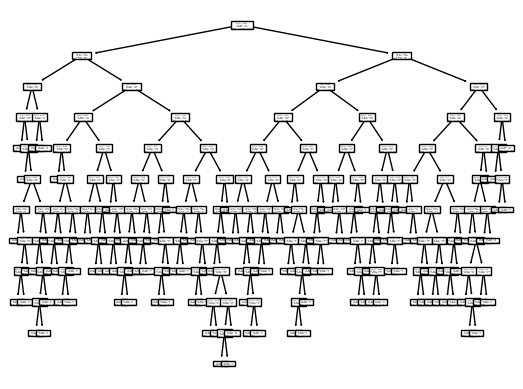

In [55]:
tree.plot_tree(model_DT_3)

<h1>Random Forest Model</h1>

## Ensemble_max_depth

In [56]:
# import time
# start_time = time.perf_counter ()

score_RF_ensemble_MD = []
for i in range(1, 10):
    model_RF_ensemble_1 = RandomForestClassifier(n_estimators=20000, max_depth=i)
    model_RF_ensemble_1.fit(X_train, y_train_encoded)
    y_pred_RF_ensemble_MD = model_RF_ensemble_1.predict(X_test)
    score_RF_ensemble_MD.append(metrics.accuracy_score(y_test_encoded, y_pred_RF_ensemble_MD))
score_RF_ensemble_MD

# end_time = time.perf_counter ()
# print(end_time - start_time, "seconds")


851.793118222 seconds


In [57]:
max(score_RF_ensemble_MD)

0.89

In [58]:
for index, num in enumerate(score_RF_ensemble_MD):
    if num > 0.88:
        print(index, num)

7 0.8875
8 0.89


## Ensemble_n_stimatorse

In [59]:
# score_RF_ensemble_ne = []
# for i in range(100, 100000, 100):
#     model_RF_ensemble_2 = RandomForestClassifier(n_estimators=i, max_depth=8)
#     model_RF_ensemble_2.fit(X_train, y_train_encoded)
#     y_pred_RF_ensemble_ne = model_RF_ensemble_2.predict(X_test)
#     score_RF_ensemble_ne.append(metrics.accuracy_score(y_test_encoded, y_pred_RF_ensemble_ne))
# score_RF_ensemble_ne

In [60]:
# max(score_RF_ensemble_ne)

In [61]:
# for index, num in enumerate(score_RF_ensemble_ne):
#     if num > 0.88:
#         print(index, num)

In [62]:
model_RF = RandomForestClassifier(n_estimators=20000, max_depth=8)

## fit model on train dataset

In [63]:
model_RF.fit(X_train, y_train_encoded)

RandomForestClassifier(max_depth=8, n_estimators=20000)

## predict test dataset

In [64]:
y_pred_RF = model_RF.predict(X_test)

## score of test and predict data

In [65]:
print('Accuracy :', metrics.accuracy_score(y_test_encoded, y_pred_RF))

Accuracy : 0.8875


In [66]:
compare2 =pd.DataFrame({'actual': y_test_encoded.flatten(),
          'predict' : y_pred_RF.flatten()})
compare2

,actual,predict
0,0,0
1,2,2
2,1,1
3,3,3
4,1,1
...,...,...
395,3,3
396,2,2
397,1,1
398,1,1


# Score

In [67]:
confusion_matrix(y_encoded, model_RF.predict(X))

array([[493,   7,   0,   0],
       [  7, 480,  13,   0],
       [  0,   9, 484,   7],
       [  0,   0,  12, 488]])

In [68]:
print(classification_report(y_encoded, model_RF.predict(X)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       500
           1       0.97      0.96      0.96       500
           2       0.95      0.97      0.96       500
           3       0.99      0.98      0.98       500

    accuracy                           0.97      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.97      0.97      0.97      2000



## crass validation of Random Forest

In [70]:
kfold2 = KFold(10)
cross_val_2 = cross_val_score(model_RF, X_train, y_train_encoded, cv=kfold2)
print(cross_val_2)

[0.8375  0.89375 0.8875  0.88125 0.85625 0.925   0.85625 0.8125  0.8875
 0.83125]


In [71]:
print(np.mean(cross_val_2))

0.8668750000000001


<h1>Support Vector Machine Model</h1>

In [72]:
model_svm = SVC()

## fit model on train dataset

In [73]:
model_svm.fit(X_train, y_train_encoded)

SVC()

## predict test dataset

In [74]:
y_pred_SVM = model_svm.predict(X_test)

## score of test and predict data

In [75]:
# print('Accuracy :', metrics.accuracy_score(y_test, y_pred))
print('Accuracy :', metrics.accuracy_score(y_test_encoded, y_pred_SVM))

Accuracy : 0.8625


In [76]:
compare3 =pd.DataFrame({'actual': y_test_encoded.flatten(),
          'predict' : y_pred_SVM.flatten()})
compare3

,actual,predict
0,0,0
1,2,2
2,1,1
3,3,3
4,1,1
...,...,...
395,3,3
396,2,2
397,1,1
398,1,1


# Ensemble

In [77]:
model_svm2 = SVC(kernel ='rbf', random_state = 42)
model_svm2.fit(X_train, y_train_encoded)
y_pred_SVM_2 = model_svm2.predict(X_test)
print('Accuracy :', metrics.accuracy_score(y_test_encoded, y_pred_SVM_2))


Accuracy : 0.8625


In [78]:
model_svm3 = SVC(kernel ='sigmoid', random_state = 42)
model_svm3.fit(X_train, y_train_encoded)
y_pred_SVM_3 = model_svm3.predict(X_test)
print('Accuracy :', metrics.accuracy_score(y_test_encoded, y_pred_SVM_3))

Accuracy : 0.2375


In [79]:
model_svm4 = SVC(kernel ='poly', degree = 4, random_state = 42)
model_svm4.fit(X_train, y_train_encoded)
y_pred_SVM_4 = model_svm4.predict(X_test)
print('Accuracy :', metrics.accuracy_score(y_test_encoded, y_pred_SVM_4))

Accuracy : 0.8575


# Score

In [80]:
confusion_matrix(y_encoded, model_svm2.predict(X))

array([[489,  11,   0,   0],
       [  8, 475,  17,   0],
       [  0,  22, 466,  12],
       [  0,   0,  34, 466]])

In [81]:
print(classification_report(y_encoded, model_svm2.predict(X)))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       500
           1       0.94      0.95      0.94       500
           2       0.90      0.93      0.92       500
           3       0.97      0.93      0.95       500

    accuracy                           0.95      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000



## crass validation_SVM


In [83]:
kfold3 = KFold(10)
cross_val_3 = cross_val_score(model_svm2, X_train, y_train_encoded, cv=kfold3)
print(cross_val_3)

[0.8     0.8875  0.9     0.86875 0.85625 0.88125 0.875   0.78125 0.88125
 0.80625]


In [84]:
print(np.mean(cross_val_3))

0.85375


In [85]:
# from sklearn.svm import LinearSVC

In [86]:
# model_svm4 = LinearSVC()
# model_svm4.fit(X_train, y_train_encoded)
# y_pred_SVM_4 = model_svm4.predict(X_test)
# print('Accuracy :', metrics.accuracy_score(y_test_encoded, y_pred_SVM_4))

## import data

In [87]:
test_data = pd.read_csv('test.csv')
test_data

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1700,1,1.9,0,0,1,54,0.5,170,...,17,644,913,2121,14,8,15,1,1,0
996,997,609,0,1.8,1,0,0,13,0.9,186,...,2,1152,1632,1933,8,1,19,0,1,1
997,998,1185,0,1.4,0,1,1,8,0.5,80,...,12,477,825,1223,5,0,14,1,0,0
998,999,1533,1,0.5,1,0,0,50,0.4,171,...,12,38,832,2509,15,11,6,0,1,0


## convert to dataframe

In [88]:
df_test = pd.DataFrame(test_data)
df_test

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1700,1,1.9,0,0,1,54,0.5,170,...,17,644,913,2121,14,8,15,1,1,0
996,997,609,0,1.8,1,0,0,13,0.9,186,...,2,1152,1632,1933,8,1,19,0,1,1
997,998,1185,0,1.4,0,1,1,8,0.5,80,...,12,477,825,1223,5,0,14,1,0,0
998,999,1533,1,0.5,1,0,0,50,0.4,171,...,12,38,832,2509,15,11,6,0,1,0


## Data analysis

In [89]:
df_test.describe()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,1248.510000,0.516000,1.540900,0.517000,4.593000,0.487000,33.652000,0.517500,139.51100,...,10.054000,627.121000,1239.774000,2138.998000,11.995000,5.316000,11.085000,0.756000,0.50000,0.507000
std,288.819436,432.458227,0.499994,0.829268,0.499961,4.463325,0.500081,18.128694,0.280861,34.85155,...,6.095099,432.929699,439.670981,1088.092278,4.320607,4.240062,5.497636,0.429708,0.50025,0.500201
min,1.000000,500.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.00000,...,0.000000,0.000000,501.000000,263.000000,5.000000,0.000000,2.000000,0.000000,0.00000,0.000000
25%,250.750000,895.000000,0.000000,0.700000,0.000000,1.000000,0.000000,18.000000,0.300000,109.75000,...,5.000000,263.750000,831.750000,1237.250000,8.000000,2.000000,6.750000,1.000000,0.00000,0.000000
50%,500.500000,1246.500000,1.000000,1.500000,1.000000,3.000000,0.000000,34.500000,0.500000,139.00000,...,10.000000,564.500000,1250.000000,2153.500000,12.000000,5.000000,11.000000,1.000000,0.50000,1.000000
75%,750.250000,1629.250000,1.000000,2.300000,1.000000,7.000000,1.000000,49.000000,0.800000,170.00000,...,16.000000,903.000000,1637.750000,3065.500000,16.000000,8.000000,16.000000,1.000000,1.00000,1.000000
max,1000.000000,1999.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.00000,...,20.000000,1907.000000,1998.000000,3989.000000,19.000000,18.000000,20.000000,1.000000,1.00000,1.000000


In [90]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

## mising value analysis

In [91]:
df_test.isna().sum()

id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

In [92]:
df_test.drop('id', axis=1, inplace=True)

In [93]:
df_test

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1700,1,1.9,0,0,1,54,0.5,170,7,17,644,913,2121,14,8,15,1,1,0
996,609,0,1.8,1,0,0,13,0.9,186,4,2,1152,1632,1933,8,1,19,0,1,1
997,1185,0,1.4,0,1,1,8,0.5,80,1,12,477,825,1223,5,0,14,1,0,0
998,1533,1,0.5,1,0,0,50,0.4,171,2,12,38,832,2509,15,11,6,0,1,0


## Test Dataset was normalized

In [94]:
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(df_test)
# unscaled = scaler.inverse_transform(scaled)
df_test_N = pd.DataFrame(scaled, columns=['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi'])

## create X,y of train 

In [95]:
X_train = pd.DataFrame(df.drop('price_range', axis=1))
y_train = pd.DataFrame(df['price_range']).values.reshape(-1, 1)


## continuous data set to multiclass was converted

In [96]:
# train
lab_enc_train = preprocessing.LabelEncoder()
y_train_encoded = lab_enc_train.fit_transform(y_train.ravel())

## create test dataset

In [97]:
X_test = pd.DataFrame(df_test_N, columns=['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi'])

## Desision tree's model was created

In [98]:
model_DT_final = DecisionTreeClassifier(criterion='log_loss', max_depth=15)


In [99]:
model_DT_final.fit(X_train, y_train_encoded)

DecisionTreeClassifier(criterion='log_loss', max_depth=15)

In [100]:
y_pred_DT_final = model_DT_final.predict(X_test)

In [101]:
y_pred_DT_final

array([3, 3, 3, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 2, 1, 3, 2, 0, 2,
       1, 1, 3, 0, 2, 0, 3, 0, 2, 0, 3, 0, 1, 1, 3, 2, 2, 1, 1, 2, 0, 0,
       0, 1, 0, 3, 1, 2, 1, 0, 3, 0, 3, 1, 3, 1, 1, 3, 3, 2, 0, 2, 1, 1,
       1, 3, 1, 1, 1, 2, 2, 3, 3, 0, 2, 0, 2, 3, 1, 3, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 1, 2, 0, 2, 1, 1, 1, 1, 2, 1, 0, 0, 3, 1, 2, 1, 1, 2, 3,
       3, 2, 1, 3, 3, 3, 3, 2, 3, 1, 0, 3, 1, 1, 2, 0, 3, 3, 2, 1, 0, 2,
       1, 1, 3, 0, 2, 0, 3, 2, 1, 2, 1, 3, 2, 3, 3, 2, 2, 3, 2, 3, 1, 0,
       3, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 2, 1, 0, 2,
       1, 0, 1, 2, 0, 0, 0, 1, 1, 3, 2, 1, 0, 0, 0, 1, 0, 3, 2, 1, 2, 2,
       3, 3, 1, 2, 3, 3, 3, 2, 2, 1, 0, 0, 1, 2, 0, 2, 3, 3, 0, 2, 0, 3,
       2, 2, 3, 0, 0, 1, 0, 3, 0, 1, 0, 2, 2, 1, 2, 1, 2, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 3, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 2, 1, 3, 2, 1, 2,
       3, 3, 3, 1, 0, 1, 2, 3, 2, 1, 3, 2, 0, 3, 0, 1, 2, 0, 0, 3, 2, 3,
       3, 2, 1, 3, 3, 2, 3, 2, 2, 1, 2, 0, 2, 3, 1,

## Random forest's model was created

In [102]:
model_RF_final = RandomForestClassifier(n_estimators=20000, max_depth=15)
model_RF_final.fit(X_train, y_train_encoded)
y_pred_RF_final = model_RF_final.predict(X_test)

In [103]:
y_pred_RF_final

array([3, 3, 2, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 2, 1, 3, 2, 1, 3,
       1, 1, 3, 0, 2, 0, 2, 0, 2, 0, 3, 0, 0, 1, 3, 1, 2, 1, 1, 2, 0, 0,
       0, 1, 0, 3, 1, 2, 1, 0, 3, 0, 3, 1, 3, 1, 1, 3, 3, 2, 0, 1, 1, 1,
       1, 3, 1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 2, 3, 0, 3, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 2, 2, 0, 2, 1, 0, 2, 1, 2, 1, 0, 0, 3, 1, 2, 0, 1, 2, 3,
       3, 3, 1, 3, 3, 3, 3, 1, 3, 0, 0, 3, 2, 1, 1, 0, 3, 2, 3, 1, 0, 2,
       1, 1, 3, 1, 1, 0, 3, 2, 1, 3, 1, 2, 2, 3, 3, 2, 2, 3, 2, 3, 0, 0,
       2, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 2, 0, 0, 0, 1, 2, 2, 2, 1, 0, 0, 0, 1, 0, 3, 1, 0, 2, 2,
       2, 3, 1, 2, 3, 3, 3, 1, 2, 1, 0, 0, 1, 3, 0, 2, 3, 3, 0, 2, 0, 3,
       2, 3, 3, 0, 0, 1, 0, 3, 0, 1, 0, 2, 2, 1, 3, 0, 3, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 3, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 1, 3, 2, 1, 2,
       3, 3, 3, 1, 0, 1, 2, 3, 1, 1, 3, 2, 0, 3, 0, 1, 2, 0, 0, 3, 2, 3,
       3, 2, 1, 3, 3, 2, 3, 2, 2, 1, 1, 0, 2, 3, 1,

## Support vector machine's model was created

In [104]:
model_svm_final = SVC(kernel ='rbf', random_state = 1)
model_svm_final.fit(X_train, y_train_encoded)
y_pred_SVM_final = model_svm_final.predict(X_test)


In [105]:
y_pred_SVM_final

array([2, 3, 2, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 2, 1, 3, 1, 1, 3,
       1, 1, 3, 0, 2, 0, 2, 0, 2, 0, 3, 0, 1, 1, 3, 1, 2, 1, 1, 2, 0, 0,
       0, 1, 0, 3, 1, 2, 1, 0, 3, 0, 3, 1, 3, 1, 0, 3, 3, 2, 0, 1, 0, 1,
       2, 3, 1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 2, 3, 0, 3, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 1, 2, 1, 2, 1, 0, 2, 1, 3, 1, 0, 0, 3, 0, 2, 0, 1, 2, 3,
       3, 2, 1, 3, 3, 3, 3, 2, 3, 0, 0, 3, 2, 1, 2, 1, 3, 2, 3, 1, 0, 2,
       1, 1, 3, 1, 1, 0, 3, 2, 1, 2, 1, 2, 2, 3, 3, 2, 2, 3, 2, 3, 1, 0,
       3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 2, 1, 0, 0, 1, 2, 2, 2, 1, 0, 0, 0, 1, 1, 3, 1, 0, 2, 2,
       2, 3, 1, 2, 3, 3, 2, 2, 2, 1, 0, 0, 1, 3, 0, 2, 3, 3, 0, 2, 0, 3,
       2, 2, 3, 1, 0, 1, 0, 3, 0, 1, 0, 2, 2, 1, 2, 1, 2, 0, 3, 1, 2, 0,
       0, 2, 1, 2, 2, 3, 1, 1, 3, 0, 0, 2, 2, 3, 1, 3, 1, 1, 3, 2, 1, 2,
       3, 3, 3, 1, 0, 1, 2, 3, 1, 1, 3, 2, 0, 3, 0, 1, 2, 0, 0, 3, 2, 3,
       3, 2, 0, 3, 3, 2, 3, 1, 2, 1, 2, 0, 2, 3, 1,

## compare tree models[DT, RF, SVM]

In [106]:
compare_DT_RF_SVM = pd.DataFrame({
    'Decision Tree': y_pred_DT_final.flatten(),
    'Random Forest' : y_pred_RF_final.flatten(),
    'Support Vector Machine' : y_pred_SVM_final.flatten(),
     })

In [107]:
compare_DT_RF_SVM

,Decision Tree,Random Forest,Support Vector Machine
0,3,3,2
1,3,3,3
2,3,2,2
3,3,3,3
4,1,1,1
...,...,...,...
995,2,2,2
996,1,1,1
997,1,0,1
998,2,2,2
